# Carta de Smith 4: Cálculos 
Rev. 04/10/2018. Autor: A. Salinas. Curso TO.18-19.

## Ejemplo 12:
Consideremos una línea de impedancia característica $Z_0=75$ $\Omega$ y velocidad de fase $v_f=2.5\times 10^8$ (m/s). Tiene una impedancia de carga $Z_L=25+\jmath 50$ $\Omega$ y su longitud es de 2 m. La frecuencia de trabajo es de 100 MHz. Calcular analíticamente y mediante la carta de Smith i) la impedancia a la entrada de la línea, ii) la distancia a la carga del primer máximo y primer mínimo de voltaje. 

### Impedancia de entrada e impedancia de onda en la línea

In [1]:
from lineas import *

Consideremos el siguiente ejemplo:

In [2]:
zl=25+1.j*50
z0=75
zln=zl/z0
ll=2
f=100E6
vp=2.5E8
w=2.*pi*f
be=w/vp
la=2.*pi/be
lln=ll/la
ga=Gr(zl,z0)

In [3]:
zin=ZwSP(ll,zl,z0,be)
Pr((zln,be,la,zin,lln,arlaG(np.angle(ga))))

3.33E-01+6.67E-01j
 2.51E+00
 2.50E+00
2.53E+01-5.08E+01j
 8.00E-01
 9.94E-02


Para calcular la impedacia de carga con la carta de Smith debemos de movernos desde la carga HACIA EL GENERADOR, una distancia igual a la longitud de la línea, normalizada a la longitud de onda. Esto equivale en movernos una distancia angular de $-4 \pi l/\lambda$, siendo $l$ la longitud de la línea. Para ello RESTAMOS este ángulo a $\phi_{\Gamma_L}$.

En el ejemplo la longitud de la linea es $l/\lambda=0.8$ que es mayor que 0.5, significa que damos una vuelta a la carta y luego seguimos $0.3\lambda$.

Como el punto de carga estaba en la escala (2) de la carta en 0.099, debemos ir hasta 0.399. En ese punto tenemos la intersección de los circulos $r=0.34$ y $x=-0.68$ que son los valores normalizados de la impedancia a la entrada de la línea.

In [5]:
Pr((zin/z0,))

3.37E-01-6.77E-01j


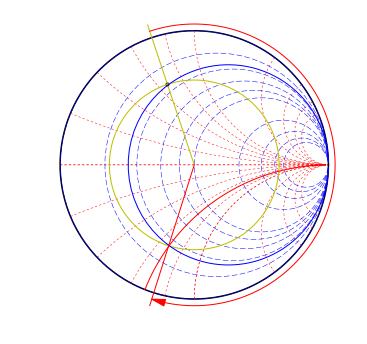

In [6]:
lln1v=lln%0.5   # Aquí quitamos las vueltas a la carta. 
fig=plt.figure()
fig.set_size_inches(5.7,5.7)
inicia()
punto(ga.real,ga.imag,c='k')
circulo(np.abs(ga),'y')
linea(0,0,*P2c(1.1,np.angle(ga)),'y')
arco(1.05,np.angle(ga),np.angle(ga)-2*2*pi*lln1v,'r')
linea(0,0,*P2c(1.1,np.angle(ga)-2*2*pi*lln1v),'r')
cirr(0.34,c='b')
cirx(-0.68,c='r')
plt.show()

Para calcular la impedancia en otro punto de la línea, el procedimiento es similar, pero nos desplazaríamos la distancia correspondiente.

### Distancia de la carga al primer máximo y primer mínimo

La fase del coeficiente de reflexión en la carga determina la distancia de la carga al primer máximo: $z_{max}'=\frac{\phi_L}{2 \beta}$, y si normalizamos a $\lambda$, $\mathfrak{z}_{max}'=\frac{\phi_L}{2*2*\pi}$. En la carta basta con medir la fase de $\Gamma_L$ en longitudes de onda. Es decir, la posición del máximo se encuentra en el corte del circulo de $\Gamma$ con la parte positiva del eje real. 

La distancia de la carga al primer mínimo se obtiene simplemente sumando $\lambda/4$, es decir 0.25 al resultado anterior. Es decir, la posición del mínimo se encuentra en el corte del circulo de $\Gamma$ con la parte negativa del eje real.

El punto de la carga en la escala (2) está en 0.099 y el eje real positivo está en 0.25. Por tanto la diferencia es 0.15$\lambda=0.375$ (m), que es la distancia de la carga al máximo.
Esta distancia corresponde a un ángulo de $4 \pi 0.15=108^o$ que es la fase del coeficiente de reflexión.

El siguiente mínimo se encuentra a 0.25$\lambda=0.625$ (m) del máximo. La distancia entre máximos y mínimos consecutivos es $\lambda/4$. La distancia a la carga es por tanto $0.4\lambda=1$ (m). 

Como 


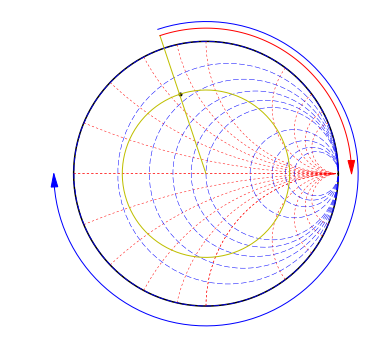

In [7]:
lln1v=lln%0.5   # Aquí quitamos las vueltas a la carta. 
fig=plt.figure()
fig.set_size_inches(6.0,6.0)
inicia()
punto(ga.real,ga.imag,c='k')
circulo(np.abs(ga),'y')
linea(0,0,*P2c(1.1,np.angle(ga)),'y')
arco(1.1,np.angle(ga),0.,'r')
arco(1.15,np.angle(ga),-pi,'b')
#plt.savefig('exaMax.eps')
plt.show()

### Medida de distancias a mínimos y máximos con la carta en admitancias

Como hemos comentado anteriormente, la admitancia se obtiene a partir de la impedancia, sin más que cambiar de signo $\Gamma_L$. Esto hace cambiar la localización de los máximos y mínimos debido a la relación inversa entre impedancias y admitancias. Los máximos se localizan en la parte negativa del eje real, mientras que los mínimos se localizan en la parte positiva. El punto de circuito abierto ahora está en el punto (-1,0) mientras que el corto circuito está en (1,0). 

Es evidente que las distancias de la carga a máximo y mínimo es independiente de que trabajemos con la carta para admitancias o impedancias.

Para el ejemplo anterior:

In [8]:
zl=25+1.j*50
z0=75
zln=zl/z0
ll=2
f=100E6
vp=2.5E8
w=2.*pi*f
be=w/vp
la=2.*pi/be
lln=ll/la
ga=Gr(zl,z0)
zpnmax=np.angle(ga)/(2*2*pi)
Pr((zpnmax,zpnmax+0.25))

 1.51E-01
 4.01E-01


Pasamos la impedancia a admitancia y determinamos ahora la distancia de la carga al mínimo. En la siguiente figura, los trazos amarillos corresponden a impedancias y los rojos a admitancias. Se ve que la distancia al mínimo, definidas por las longitudes angulares de los arcos, son claramente iguales.

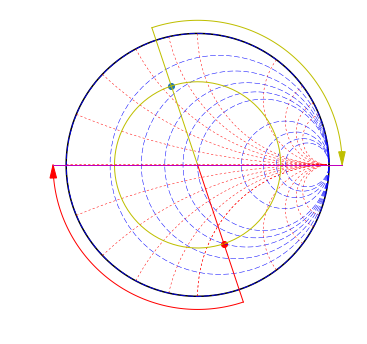

In [9]:
fig=plt.figure()
fig.set_size_inches(5.7,5.7)
inicia()
plt.scatter(ga.real,ga.imag)
circulo(np.abs(ga),'y')
linea(0,0,*P2c(1.1,np.angle(ga)),'y')
arco(1.1,np.angle(ga),0,'y')
linea(0,0,1.1,0,'y')
plt.scatter(-ga.real,-ga.imag,c='r')
linea(0,0,*P2c(1.1,np.angle(ga)+pi),'r')
arco(1.1,np.angle(ga)+pi,pi,'r')
linea(-1.1,0,1.1,0,'m')
plt.show()